In [2]:
import xarray
url = 'http://dapds00.nci.org.au/thredds/dodsC/ua6/authoritative/CMIP5/CSIRO-BOM/ACCESS1-0/amip/day/atmos/day/r1i1p1/latest/ua/ua_day_ACCESS1-0_amip_r1i1p1_19790101-19831231.nc'
data = xarray.open_dataset(url)
ua = data['ua']

Array indices work like Python or Numpy arrays

In [3]:
ua[1,1,:,:]

<xarray.DataArray 'ua' (lat: 144, lon: 192)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ..., 
       [-13.3355341 , -13.77951622, -14.2174511 , ..., -11.98992062,
        -12.43802834, -12.88754463],
       [-12.88020611, -13.16633129, -13.44441891, ..., -11.98670959,
        -12.28912067, -12.58736801],
       [-12.23143196, -12.40016842, -12.55766201, ..., -11.66174984,
        -11.86182308, -12.05184937]])
Coordinates:
    time     datetime64[ns] ...
    plev     float64 ...
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 -81.88 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
 



Index select allows you to use coordinate names, clearer when there are more dimensions

In [5]:
ua.isel(time=5, plev=slice(1,5))

<xarray.DataArray 'ua' (plev: 4, lat: 144, lon: 192)>
[110592 values with dtype=float64]
Coordinates:
    time     datetime64[ns] ...
  * plev     (plev) float64 8.5e+04 7e+04 5e+04 2.5e+04
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 -84.38 -83.12 -81.88 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
    units: m s-1
    cell_methods: time: mean
    history: 2012-05-23T13:18:14Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20). 2012-05-23T13:18:15Z altered by CMOR: Inverted axis: plev.
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-0_amip_r0i0p0.nc



Value select let's you slice based on the co-ordinate's value

In [10]:
ua.sel(lat=slice(-10, 10), lon=slice(0,360))

<xarray.DataArray 'ua' (time: 1826, plev: 8, lat: 16, lon: 192)>
[44875776 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 1979-01-02T12:00:00 ...
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -9.375 -8.125 -6.875 -5.625 -4.375 -3.125 -1.875 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
    units: m s-1
    cell_methods: time: mean
    history: 2012-05-23T13:18:14Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20). 2012-05-23T13:18:15Z altered by CMOR: Inverted axis: plev.
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-0_amip_r0i0p0.nc

Methods can be combined

In [13]:
equator = ua.sel(lat=slice(-10, 10), lon=slice(0,360))
equator0 = equator.isel(time=0, plev=0)
equator0

<xarray.DataArray 'ua' (lat: 16, lon: 192)>
array([[-0.05207055,  0.43285596,  1.1578908 , ..., -2.4282558 ,
        -1.60375333, -0.67299384],
       [-0.27732241,  0.39665782,  1.10125482, ..., -2.48294568,
        -1.70359683, -0.97290492],
       [-0.43866971,  0.34721199,  0.94279772, ..., -3.1319294 ,
        -2.29267311, -1.36595845],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    time     datetime64[ns] ...
    plev     float64 ...
  * lat      (lat) float64 -9.375 -8.125 -6.875 -5.625 -4.375 -3.125 -1.875 ...
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 8.438 10.31 12.19 14.06 ...
Attributes:
    standard_name: eastward_wind
    long_name: Eastward Wind
    units: m s-1
    cell_methods: tim

You can also perform nearest-neighbour interopolation

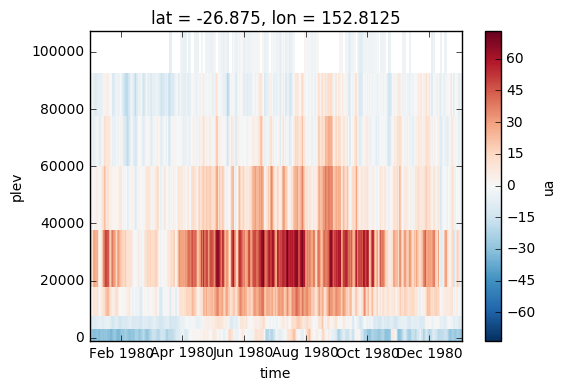

In [23]:
%matplotlib inline
ua.sel(time=slice('1980-01-01','1981-01-01')).sel(lat=-27.4698, lon=153.0251, method='nearest').plot(x='time',y='plev')